# Diseño de discontinuidad de regresión

In [24]:
# María Fernanda Carrillo (20201596)

## Parte I. Reporte

La pregunta de investigación la cual el ‘paper’ busca responder refiere a los factores que influyen en la motivación de un infante para perseguir la invención como una carrera profesional. Así analizando muchos de las variables del contexto en el cual se desenvuelven los niños y viendo si es de que esta decisión fue producto de su naturaleza (‘nature’) o crianza (‘nurture’); viendo sobre todo cuáles y cuánto influyeron en ellos. 

Un aspecto trasversal del estudio es que basa su investigación en los factores que impactan a los grupos de interés cuando se encuentran en la niñez, en tanto adjudican que son los resultados de exámenes de matemática los cuales son un indicador altamente predictivo de tasas de innovación. Y, más específicamente que es la exposición a la invención desde pequeños tiene efectos causales significativos en los niños para innovar. No obstante, es que considero que se debería estudiar no solo el impacto desde la niñez, sino el contacto prolongado con la invención a lo largo de la adolescencia también, ya que cuando se hace la elección de carrera, muchas veces son las experiencias más recientes o el estilo de vida que ha estado llevando lo que impacta más a ese joven adulto, por lo general, a punto de ingresar a la universidad.

Sin embargo, es que dentro del mismo ‘paper’ es que se puede hallar un estudio bastante completo de las variables a las cuales se les pone atención y cuáles son las que más impactan en los “Einsteins perdidos”. Tomando en cuenta factores como la exposición a figuras de tal ámbito, o ámbitos a veces dejados de lado como el factor de género o raza que, de hecho, es un diferenciador con bastante peso. Asimismo, reconoce su propia limitación y deja en claro de que no propone legislación o política alguna con el fin de cambiar el contexto actual; aunque sí sienta un buen punto de partida al exponer cuáles son los catalizadores de la diferencia en el perseguir una carrera en invención. Ello al facilitar el trabajo future concerniente a este tópico es que construye una base de datos pública la cual cuenta con estadísticas adecuadas; y cuenta como una contribución no solo al campo del estudio de estas variables, sino que también al ámbito de la política en tanto facilita su trabajo en la búsqueda de estos patrones y trae este problema a la luz de los legisladores que pueden cambiar ello. Pues como bien lo destacan es que, de haber tenido las condiciones adecuadas, principalmente enfocadas en familias con bajos ingresos, minorías y mujeres, es que existirían cerca de 4x veces los inventores actuales en el país de estudio. 

No obstante, es que las incidencias dentro del campo de la innovación no quedan ahí, pues si bien es complicado para muchos de estos grupos marginalizados el acceder o perseguir esta carrera en primer lugar por los factores previamente mencionados es que podemos encontrar, dentro del mismo campo, problemas similares. Como el estudio de Chell y Karatas-Özkan (2013), en el cual encuentran que dentro de la academia de innovación e iniciativa se encuentran fuertes diferenciaciones catalizadas por el pertenecer a una minoría. Es así que esta búsqueda de cambio dentro del campo, no solo desde las jóvenes promesas que no pueden por factores ajenos a ellos el ingresar, debe ser la misma que de las personas que se encuentran dentro y que atraviesan semejantes desafíos en el campo. Un problema que se ha de vislumbrar y dar más cabida en la conversación de estos tópicos. 

Chell y Karatas-Özkan (2013). https://www.tandfonline.com/doi/full/10.1080/00131857.2020.1777640

 ## Parte II. Código

1. Explique de manera muy breve y resumida en qué consiste una regresión discontinua.

Una regresión discontinua se trata de un diseño cuasi-experimental (es decir un modelo en el cual se pone a prueba una hipótesis causal mediante la manipulación de la variable independiente, que en la vida real no puede ser asignada aleatoriamente a los grupos estudiados), el cual busca investigar los efectos causales de la intervención estudiada mediante la asignación de un valor de corte por debajo o encima del asignado por la intervención. Es decir, que el criterio de separación entre los grupos es el valor de corte propio de la variable causal. 


2. Detalle un ejemplo en la vida real en donde podría emplear una regresión discontinua.

Un ejemplo de la vida real se puede aplicar, por ejemplo, a un programa de capacitación para jóvenes en búsqueda de un empleo; en el cual la edad máxima de aceptación es hasta los 24 años. Es mediante este corte que se puede observar a dos grupos, ambos aplicantes y motivados a  participar en este pero sin embargo solo aquellos que tienen menos de 25 serán aceptados. Así se podría aplicar una regresión discontinua meses después de concluido el curso y comparar el éxito que tienen tanto el grupo que participó en el programa como aquellos que no. 


3. Explique el diseño Sharp Design y comente un ejemplo en la vida real en donde podría aplicarlo (sea lo más detallado posible).

El 'sharp design' o conocido como nítida en español se trata de una de tipo más determinista. Es decir que la probabilidad de asignación cambia de 0 a 1 en el umbral respecto al valor asignado, no hay espacio para que esta probabilidad de asignación cambie. Ello se debe sobre todo a que se cuenta con independencia de otros factores; así siendo que se categorizan en alguno de los dos grupos si traspasan el umbral. Es así que el ejemplo anterior, referente al programa de empleo y la edad como el corte que separa a ambos grupos consta de un buen ejemplo en tanto es determinístico, no importa si tienes 25 y 1 día o 2 y 327 días, ya no puedes ingresar a tal curso. 

### Aplicaciones 

#### Caso 1

$$
    Y = 15 + 22*D + 2.5 * X + e
$$

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

In [21]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 15 + 22*dat.D + 2.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

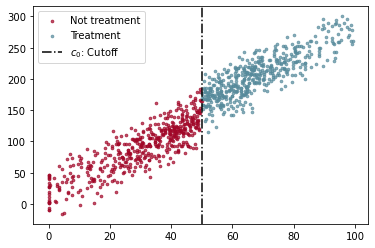

In [22]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [23]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

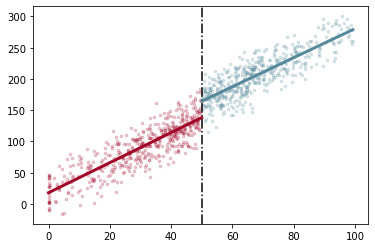

In [24]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

##### Jump Effect

In [25]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 26.38


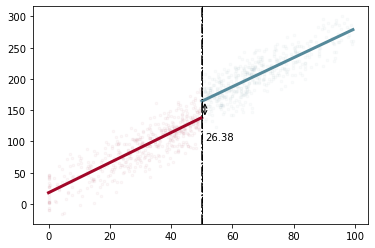

In [26]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));

#### Caso 2

$$
    Y = 12 + 60*D + 1.3 * X + e
$$

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

In [28]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 12 + 60*dat.D + 1.3 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

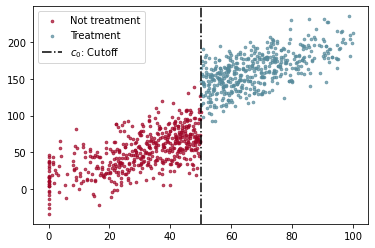

In [29]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [30]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

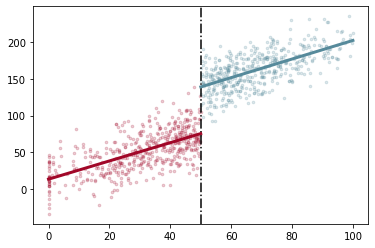

In [31]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

##### Jump Effect

In [32]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 63.65


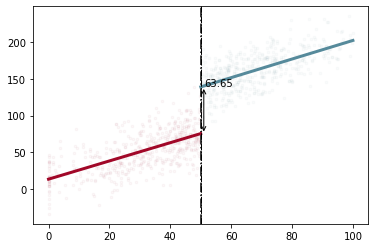

In [33]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));